`Import the modules`

In [760]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

`Read the data from the csv file and make a pandas dataframe of that`

In [761]:
df = pd.read_csv('profiles.csv')

`Get some info about the dataframe`

In [762]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [763]:
print('Some descriptive statistic data of numerical variables')
df.describe()

Some descriptive statistic data of numerical variables


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [764]:
print('You can see above that the height and the income columns include data unrealistic.')

You can see above that the height and the income columns include data unrealistic.


In [765]:
print('Unique values of income')
df.income.unique()

Unique values of income


array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

In [766]:
df[df.income == -1].head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available


In [767]:
df.sex.replace(['m', 'f'], ['male', 'female'], inplace=True)

In [768]:
print('The number of observations with income value -1 is: ', len(df[df.income == -1]))

The number of observations with income value -1 is:  48442


In [769]:
print('''We could drop the whole income column because -1 is not a usual categorical variable and definitely not
a continuous numerical variable. Thus we cannot use them or replace the values without avoiding bias.''')

We could drop the whole income column because -1 is not a usual categorical variable and definitely not
a continuous numerical variable. Thus we cannot use them or replace the values without avoiding bias.


In [770]:
df = df.drop('income', axis=1)

In [771]:
print('Unique values of height')
df.height.unique()

Unique values of height


array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

In [772]:
print('''The smallest 18 year-old-man in the world is 29 inches, thus we can replace, or drop the values if they are lower than that.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545''')

The smallest 18 year-old-man in the world is 29 inches, thus we can replace, or drop the values if they are lower than that.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545


In [773]:
df = df[~((df.height <= 29) | (df.height.isna()))]

In [774]:
df.describe()

,age,height
count,59936.000000,59936.000000
mean,32.340313,68.302306
std,9.453114,3.940899
min,18.000000,36.000000
25%,26.000000,66.000000
50%,30.000000,68.000000
75%,37.000000,71.000000
max,110.000000,95.000000


In [775]:
df.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93., 54., 82., 86.,
       42., 84., 94., 50., 47., 49., 48., 90., 88., 37., 51., 92., 85.,
       89.])

`Make cms from inches`

In [776]:
df.height = df.height*2.54

`Take a look at the "nan" values of the whole dataframe`

In [777]:
df_isna = df.isna().sum().sort_values()
#df_isna

`Choose some and categorical and numerical variables and put them into a list`

In [778]:
cats_and_nums = ['age', 'diet', 'sex', 'orientation', 'height', 'status', 'drinks', 'body_type', 'smokes']

In [779]:
for feature in cats_and_nums:
    print(df[feature].value_counts())

age
26     3724
27     3685
28     3583
25     3528
29     3294
24     3242
30     3148
31     2735
23     2592
32     2585
33     2206
22     1934
34     1902
35     1755
36     1582
37     1427
38     1330
21     1282
39     1171
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      458
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64
diet
mostly anything        16583
anything                6183
strictly anything       5113
mostly vegetarian       3443
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           22

In [780]:
def unique(features, data):
    for feature in features:
        if data[feature].dtype not in ['int64', 'float64']:
            data[feature] = data[feature].fillna('unknown')
            yield feature, data[feature].unique()

In [781]:
test_1 = list(unique(cats_and_nums, df))

In [782]:
test_1

[('diet',
  array(['strictly anything', 'mostly other', 'anything', 'vegetarian',
         'unknown', 'mostly anything', 'mostly vegetarian',
         'strictly vegan', 'strictly vegetarian', 'mostly vegan',
         'strictly other', 'mostly halal', 'other', 'vegan',
         'mostly kosher', 'strictly halal', 'halal', 'strictly kosher',
         'kosher'], dtype=object)),
 ('sex', array(['male', 'female'], dtype=object)),
 ('orientation', array(['straight', 'bisexual', 'gay'], dtype=object)),
 ('status',
  array(['single', 'available', 'seeing someone', 'married', 'unknown'],
        dtype=object)),
 ('drinks',
  array(['socially', 'often', 'not at all', 'rarely', 'unknown',
         'very often', 'desperately'], dtype=object)),
 ('body_type',
  array(['a little extra', 'average', 'thin', 'athletic', 'fit', 'unknown',
         'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
         'used up', 'overweight'], dtype=object)),
 ('smokes',
  array(['sometimes', 'no', 'unkn

`Making pie charts, countplots and histograms of the features from the list`

In [783]:
def charts(features, dataframe):
    for feat in features:
        plt.figure(figsize=[10, 7])
        data = dataframe[feat]
        title = f'Distribution of {feat} of {len(data)} participants'
        if data.dtype == 'object':
            if data.nunique() < 6:
                plt.pie(data.value_counts(), autopct='%d%%', pctdistance=.85, explode=[0.05 for i in range(data.nunique())],
                colors=sns.color_palette('Set1'))
                plt.title(title)
                plt.legend(data.unique())
                plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.7, facecolor='lightblue'))
            else:
                sns.countplot(x=data, saturation=0.75, palette='Set1')
                plt.title(title)
                plt.xticks(rotation=15, fontsize=9)
        elif data.dtype in ['int64', 'float64']:
            sns.histplot(x=feat, data = dataframe, hue='sex', bins=30)
            plt.title(title)
            mean = np.mean(data).round()
            plt.axvline(mean, color='red')
            plt.text(x=mean*1.1, y=7000, s=f'Mean: {mean}')
        plt.show()
        plt.clf()

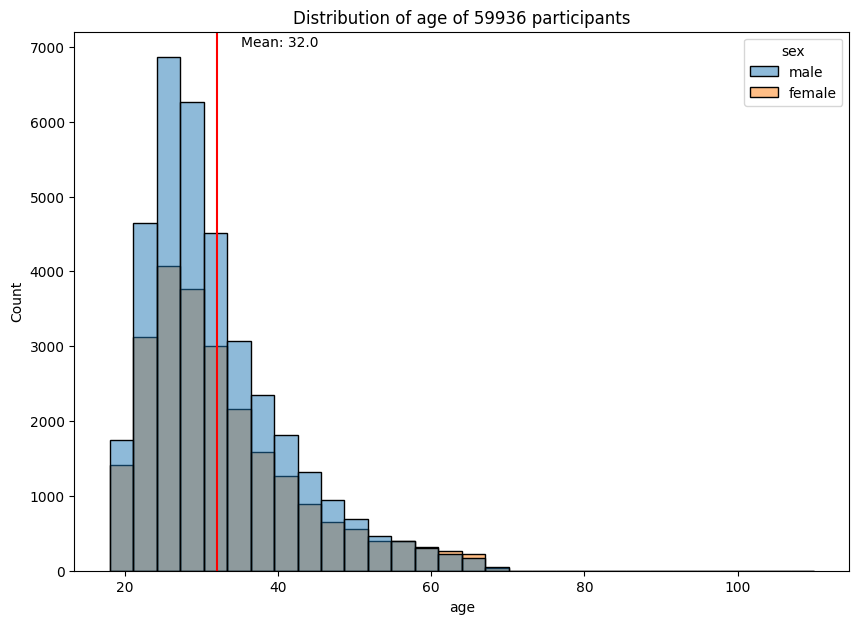

<Figure size 640x480 with 0 Axes>

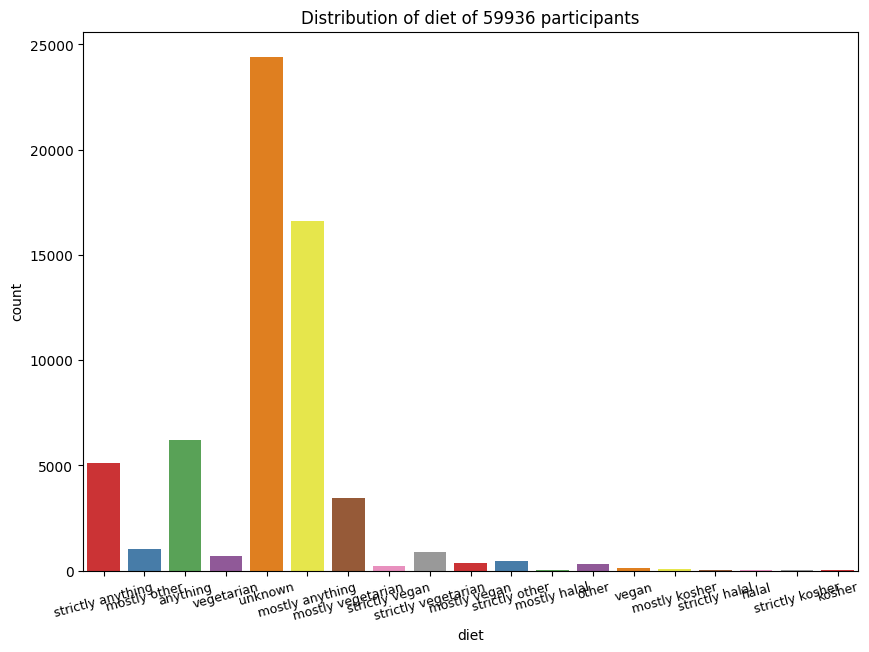

<Figure size 640x480 with 0 Axes>

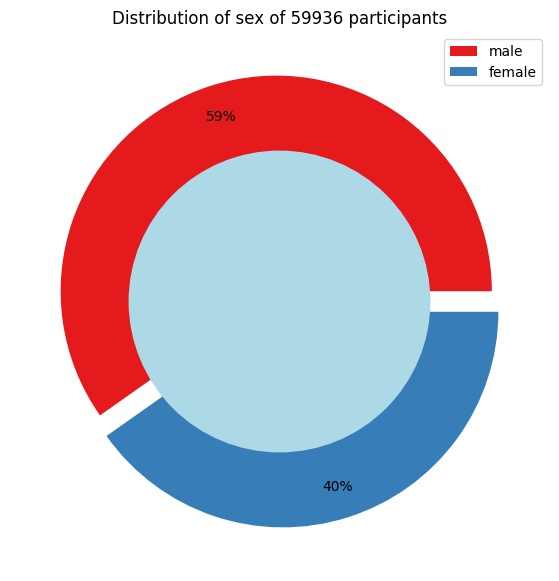

<Figure size 640x480 with 0 Axes>

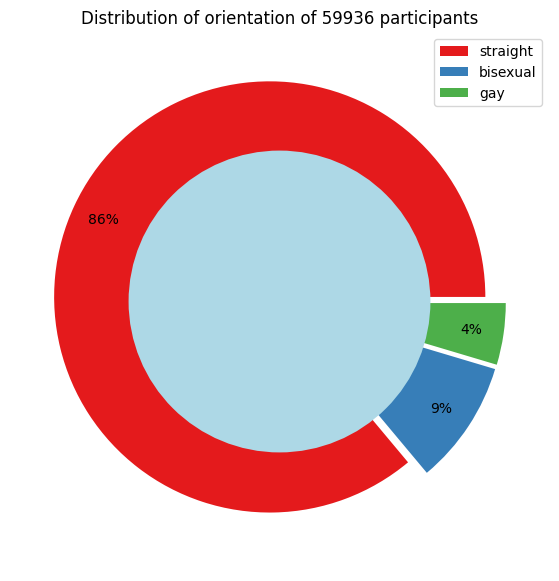

<Figure size 640x480 with 0 Axes>

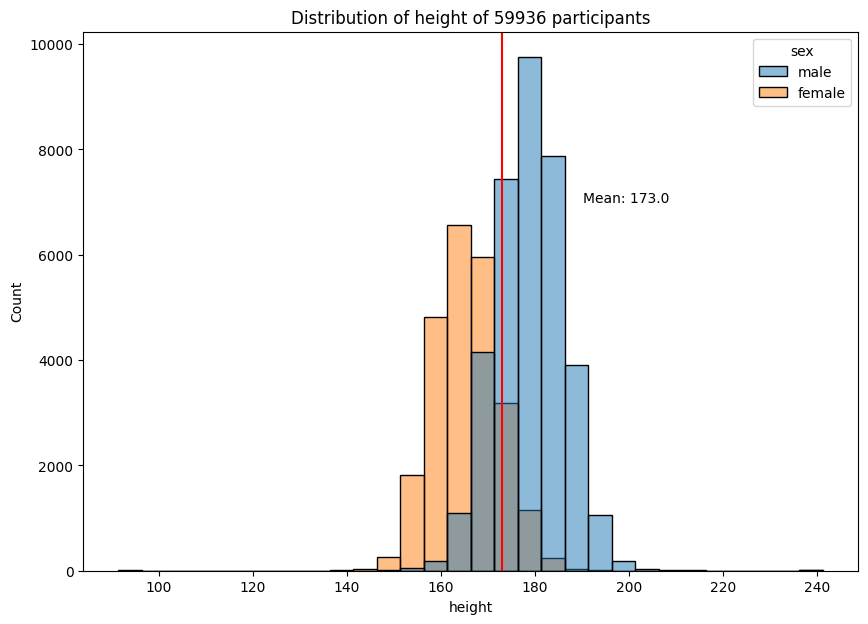

<Figure size 640x480 with 0 Axes>

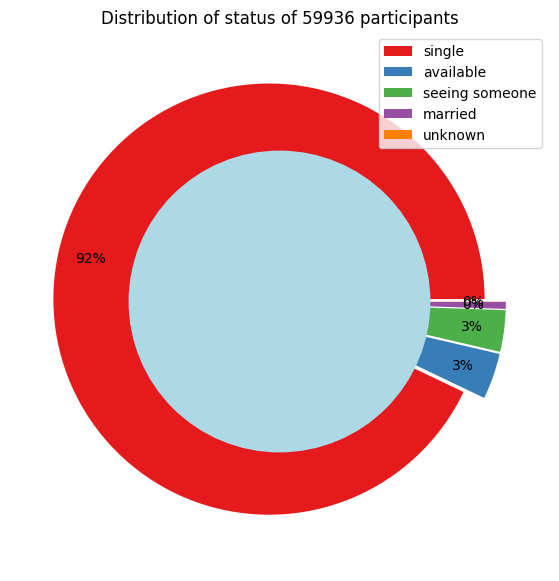

<Figure size 640x480 with 0 Axes>

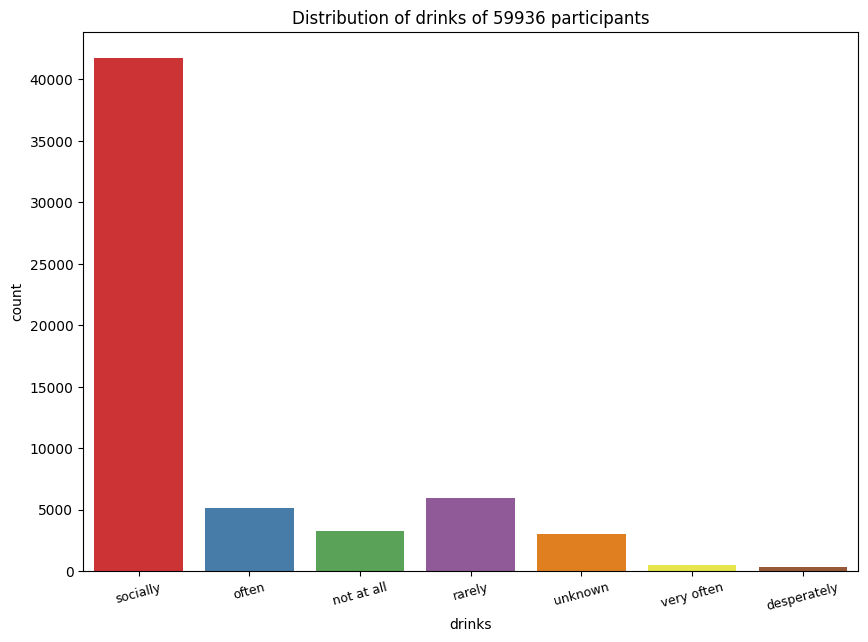

<Figure size 640x480 with 0 Axes>

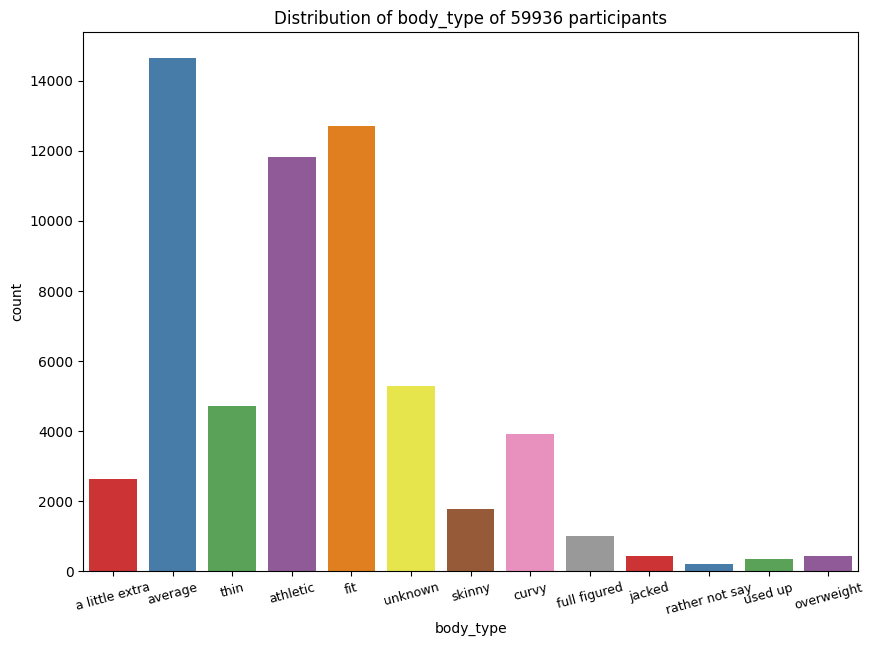

<Figure size 640x480 with 0 Axes>

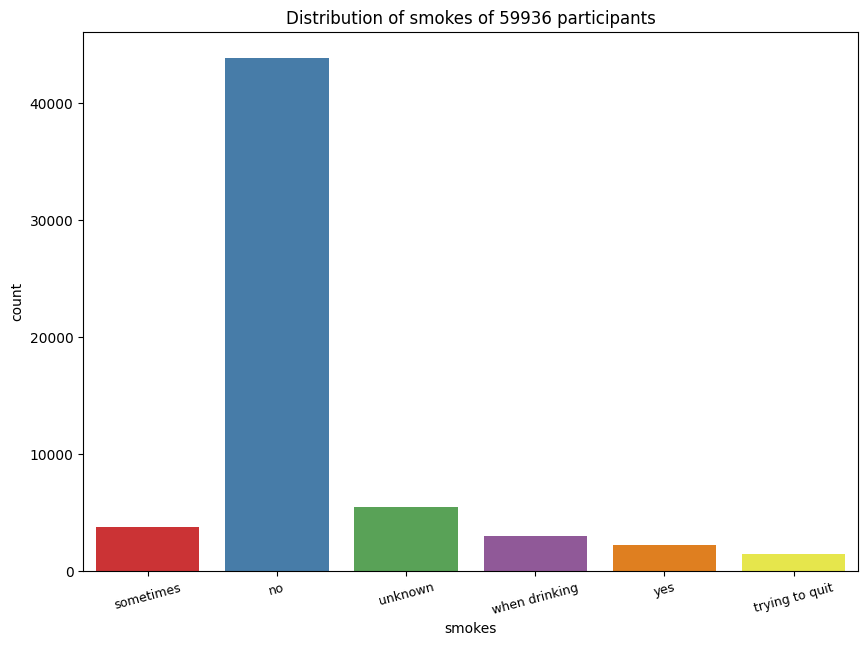

<Figure size 640x480 with 0 Axes>

In [784]:
test_2 = charts(cats_and_nums, df)

`Change the dtypes of "sex, orientation and status" categorical columns from object to int`

In [785]:
df.sex = np.where(df['sex'] == 'male', 1, 0)
df.orientation = df.orientation.replace(['straight', 'bisexual', 'gay'], [2, 1, 0])
df['status'] = df['status'].replace(['single', 'available', 'seeing someone'], 1)
df['status'] = df['status'].replace(['married', 'unknown'], 0)

In [786]:
encodeable = cats_and_nums[-3:]

In [787]:
encodeable

['drinks', 'body_type', 'smokes']

In [788]:
for uncoded_feature in encodeable:
    encoder = LabelEncoder()
    df[uncoded_feature] = encoder.fit_transform(df[uncoded_feature])
    

In [789]:
df_model = df[cats_and_nums]

In [790]:
df_model

,age,diet,sex,orientation,height,status,drinks,body_type,smokes
0,22,strictly anything,1,2,190.50,1,4,0,1
1,35,mostly other,1,2,177.80,1,2,2,0
2,38,anything,1,2,172.72,1,4,10,0
3,23,vegetarian,1,2,180.34,1,4,10,0
4,29,unknown,1,2,167.64,1,4,1,0
...,...,...,...,...,...,...,...,...,...
59941,59,unknown,0,2,157.48,1,4,11,0
59942,24,mostly anything,1,2,182.88,1,2,4,0
59943,42,mostly anything,1,2,180.34,1,1,2,0
59944,27,mostly anything,1,2,185.42,1,4,1,2


`Make the predictor and the outcome variables.`

`X is equal to a pandas dataframe with the chosen features and y is equal to a pandas series with status`

In [791]:
X = df[cats_and_nums[:-4]]
y = df.status

In [792]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

In [793]:
model1 = LogisticRegression()

In [794]:
model1.fit(X_train, y_train)

ValueError: could not convert string to float: 'unknown'

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred), model1.score(X_test, y_test)

In [ ]:
#df.sign.unique()

In [ ]:
sign_dict = {'gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'scorpio',
       'capricorn and it&rsquo;s fun to think about', 'leo',
       'aries but it doesn&rsquo;t matter', 'aries',
       'scorpio but it doesn&rsquo;t matter',
       'sagittarius and it&rsquo;s fun to think about',
       'libra and it matters a lot',
       'taurus and it&rsquo;s fun to think about',
       'leo and it matters a lot',
       'virgo and it&rsquo;s fun to think about',
       'cancer and it matters a lot', 'capricorn',
       'pisces and it matters a lot', 'aries and it matters a lot',
       'capricorn and it matters a lot', 'aquarius and it matters a lot',
       'sagittarius and it matters a lot', 'gemini and it matters a lot',
       'taurus and it matters a lot', 'virgo and it matters a lot'}

In [ ]:
df.location.unique()

In [ ]:
df.sex

In [ ]:
df.columns

In [ ]:
df_new = df.drop(['essay0','essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9',], axis=1)

In [ ]:
df_new.head(2)

In [ ]:
df_new.body_type.unique(), df_new.drugs.unique(), df_new.drinks.unique()

In [ ]:
features = list(df_new.columns)

In [ ]:
features

In [ ]:
df_new.ethnicity.unique()

In [ ]:
features.pop(6)

In [ ]:
np.max(df_new.last_online.unique())

In [ ]:
np.min(df_new.last_online.unique())

In [ ]:
fix_features = ['age', 'height', 'income', 'sex']

In [ ]:
varied_features = np.random.choice([feature for feature in features if feature != fix_features], 3)

In [ ]:
final_features = fix_features + list(varied_features)

In [ ]:
final_features

In [ ]:
pd.get_dummies(df_new[final_features], drop_first=True)

In [ ]:
df.status.unique()

In [ ]:
df.status.unique()

In [ ]:
y = df.status